In [99]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#import Recommenders as Recommenders
#import turicreate

In [100]:
df_columns=['user_id','prod_id','rating']

In [101]:
df=pd.read_csv('ratings_Electronics.xls', names=df_columns)

In [102]:
df.head()

,user_id,prod_id,rating
0,AKM1MP6P0OYPR,132793040,5
1,A2CX7LUOHB2NDG,321732944,5
2,A2NWSAGRHCP8N5,439886341,1
3,A2WNBOD3WNDNKT,439886341,3
4,A1GI0U4ZRJA8WN,439886341,1


In [103]:
df.dtypes

user_id    object
prod_id    object
rating      int64
dtype: object

In [104]:
df.shape

(1048576, 3)

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048576 entries, 0 to 1048575
Data columns (total 3 columns):
user_id    1048576 non-null object
prod_id    1048576 non-null object
rating     1048576 non-null int64
dtypes: int64(1), object(2)
memory usage: 24.0+ MB


In [106]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
rating,1048576.0,3.97338,1.399329,1.0,3.0,5.0,5.0,5.0


(array([128251.,      0.,  62644.,      0.,      0.,  83509.,      0.,
        208535.,      0., 565637.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

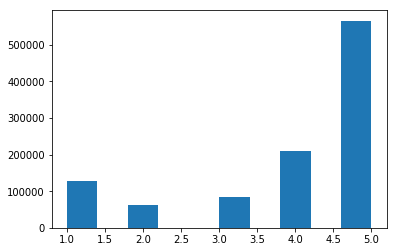

In [107]:
plt.hist(df['rating'])

In [108]:
df.isnull().sum()

user_id    0
prod_id    0
rating     0
dtype: int64

In [109]:
df.shape

(1048576, 3)

In [110]:
df.groupby(df['rating']).count()

,user_id,prod_id
rating,,
1,128251,128251
2,62644,62644
3,83509,83509
4,208535,208535
5,565637,565637


In [15]:
# As per the above statics , we can observe that rating 5 has given by many users for products, and then rating 4 followed by rating
# 1

In [111]:
print("total unique users - ",len(df["user_id"].unique()))

total unique users -  786330


In [112]:
print("total unique items - ",len(df["prod_id"].unique()))

total unique items -  61894


In [145]:
ratings_df_grouped = df.groupby(['prod_id']).agg({'rating': 'count'}).reset_index()
ratings_df_grouped.sort_values('rating',ascending = 0).head(5)

,prod_id,rating
30276,B0002L5R78,9487
24439,B0001FTVEK,5345
61285,B000I68BD4,4903
46504,B000BQ7GW8,4275
14183,B00007E7JU,3523


In [138]:
ratings_df2_grouped = df.groupby(['user_id']).agg({'rating': 'count'}).reset_index()

In [139]:
temp=ratings_df2_grouped[ratings_df2_grouped['rating']>50]

In [140]:
#df_new = df[for each in df['user_id']user_list]
#df2=np.where(df2['Normal_Nucleoli']>=8, 8, df2['Normal_Nucleoli'])
#df=df.drop(df['user_id']!=temp['user_id'], axis=0, inplace=True)
# Considering the subset of data SUCH THAT users who has given morethan 50 ratings for any product
df_new=df[df.user_id.isin(temp.user_id)]

In [141]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3406 entries, 2162 to 1048158
Data columns (total 3 columns):
user_id    3406 non-null object
prod_id    3406 non-null object
rating     3406 non-null int64
dtypes: int64(1), object(2)
memory usage: 106.4+ KB


In [155]:
ratings_df_new_grouped = df_new.groupby(['prod_id']).agg({'rating': 'count'}).reset_index()
ratings_df_new_grouped.sort_values('rating',ascending = 0).head(5)

,prod_id,rating
144,B00004SB92,7
317,B00004ZCJE,5
2403,B0009RKL5S,5
1065,B00007KDVI,5
1191,B00008OE6I,5


In [142]:
# Above are the top 5 prodcuts to recommend to any new usersn_users = ratings.user_id.unique().shape[0]
n_items = df_new.prod_id.unique().shape[0]
n_items

2907

In [121]:
from surprise import Dataset,Reader
rating = Reader(rating_scale=(1, 5))

In [143]:
df_new.columns

Index(['user_id', 'prod_id', 'rating'], dtype='object')

In [122]:
data = Dataset.load_from_df(df_new[['user_id', 'prod_id', 'rating']], rating)

In [123]:
data

In [156]:
#Split the data into test and train
from surprise.model_selection import train_test_split
trainset, testset = train_test_split(data, test_size=.30,random_state=123)

In [125]:
type(trainset)

surprise.trainset.Trainset

In [126]:
from surprise import KNNWithMeans
from surprise import accuracy
from surprise import Prediction

In [128]:
algo = KNNWithMeans(k=51, sim_options={'name': 'pearson', 'user_based': True})
algo.fit(trainset)

Computing the pearson similarity matrix...
Done computing similarity matrix.


In [129]:
test_pred = algo.test(testset)

# compute RMSE
accuracy.rmse(test_pred)

RMSE: 1.1300


1.1300403133735786

In [130]:
testset_new = trainset.build_anti_testset()

In [131]:
testset_new[:]

[('ABH9D1TEOJ56E', 'B000HVXIT2', 4.209312080536913),
 ('ABH9D1TEOJ56E', 'B00006L9CT', 4.209312080536913),
 ('ABH9D1TEOJ56E', 'B0000DK6CT', 4.209312080536913),
 ('ABH9D1TEOJ56E', 'B00007G3DL', 4.209312080536913),
 ('ABH9D1TEOJ56E', 'B00001ZUNQ', 4.209312080536913),
 ('ABH9D1TEOJ56E', 'B0000AOWWY', 4.209312080536913),
 ('ABH9D1TEOJ56E', 'B000BM2Q7W', 4.209312080536913),
 ('ABH9D1TEOJ56E', 'B000AFY48O', 4.209312080536913),
 ('ABH9D1TEOJ56E', 'B00067OEPO', 4.209312080536913),
 ('ABH9D1TEOJ56E', 'B00067M5N2', 4.209312080536913),
 ('ABH9D1TEOJ56E', 'B0000D8HAD', 4.209312080536913),
 ('ABH9D1TEOJ56E', 'B00076OZQC', 4.209312080536913),
 ('ABH9D1TEOJ56E', 'B00007KDVI', 4.209312080536913),
 ('ABH9D1TEOJ56E', 'B000092M1T', 4.209312080536913),
 ('ABH9D1TEOJ56E', 'B0000AAAPF', 4.209312080536913),
 ('ABH9D1TEOJ56E', 'B000EBK3FW', 4.209312080536913),
 ('ABH9D1TEOJ56E', 'B0002WPSBC', 4.209312080536913),
 ('ABH9D1TEOJ56E', 'B00013M6NU', 4.209312080536913),
 ('ABH9D1TEOJ56E', 'B00009LIG5', 4.20931208053

In [132]:
predictions = algo.test(testset_new[:])

In [133]:
predictions_df = pd.DataFrame([[x.uid,x.iid,x.est] for x in predictions])

In [134]:
predictions_df.columns = ["user_id","prod_id","rating"]
predictions_df.sort_values(by = ["user_id", "rating"],ascending=False,inplace=True)

In [168]:
top_5_recos = predictions_df.groupby("user_id").head(5).reset_index(drop=True)

In [169]:
top_5_recos

,user_id,prod_id,rating
0,AWPODHOB4GFWL,B00008PVXA,4.642857
1,AWPODHOB4GFWL,B000HVXIT2,4.642857
2,AWPODHOB4GFWL,B00006L9CT,4.642857
3,AWPODHOB4GFWL,B0000DK6CT,4.642857
4,AWPODHOB4GFWL,B00007G3DL,4.642857
5,AT6CZDCP4TRGA,B0000A602S,4.886869
6,AT6CZDCP4TRGA,B0002ZAIOG,4.886869
7,AT6CZDCP4TRGA,B0007QKMQY,4.886869
8,AT6CZDCP4TRGA,B0000630TO,4.886869
9,AT6CZDCP4TRGA,B00002EQD2,4.886869


In [170]:
top_5_recos[top_5_recos['user_id']=='AT2J7H5TRZM8Z']
# Try for user AT2J7H5TRZM8Z, and chek the top 5 products recommeded for that user.

,user_id,prod_id,rating
10,AT2J7H5TRZM8Z,B000BKJZ9Q,4.691796
11,AT2J7H5TRZM8Z,B00004ZCDD,4.691796
12,AT2J7H5TRZM8Z,B00008K4BD,4.691796
13,AT2J7H5TRZM8Z,B000069AT9,4.691796
14,AT2J7H5TRZM8Z,B00007B6L5,4.691796


In [157]:
from surprise import SVD

In [158]:
svd_model = SVD(n_factors=4,biased=False)
svd_model.fit(trainset)

In [159]:
test_pred = svd_model.test(testset)

In [160]:
test_pred_df = pd.DataFrame([[x.uid,x.iid,x.est] for x in test_pred])

In [161]:
test_pred_df.head()

,0,1,2
0,A2R6RA8FRBS608,B00005UKBG,4.209312
1,A2AEZQ3DGBBLPR,B00009KO0D,4.209312
2,A2R6RA8FRBS608,B0002Z240M,1.000000
3,A11D1KHM7DVOQK,B00004T8R2,1.000000
4,A1JWSDDIH5Z7DV,B0002KQR1O,4.209312


In [162]:
accuracy.rmse(test_pred)

RMSE: 1.8141


1.8140866806321614

In [ ]:
#Insights:-
# 1) For popularity based recommenders systems, sicne it is non perosonalised system for every user top list of 5 products will 
# recommend 
# 2) For collborative based recommender system, based on similarirty between products , each product will recommend to the new
# or existing users based on ratings given by other users. each user to user the recommendation may vary . since it is 
# personslied to users, <line number 161>
# Accuary/RMSE is 1.13 for Collabarative recommender system , however if we use SVD accouacty has increased as 1.81. Hence 
# SVD is good model for this kind of data , when compared to collabarative systems. 